In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
file_list = os.listdir("/works/Data/Dacon/health_data_clf/")
file_list = [file for file in file_list if file.endswith(".csv")]
print(file_list)

['train_labels.csv', 'test_features.csv', 'train_features.csv', 'sample_submission.csv']


In [3]:
file_path = "/works/Data/Dacon/health_data_clf/"
train_label = pd.read_csv(file_path + file_list[0])
test_features = pd.read_csv(file_path + file_list[1])
train_features = pd.read_csv(file_path + file_list[2])
sample_submissuib = pd.read_csv(file_path + file_list[3])

print(train_label.shape)
print(test_features.shape)
print(train_features.shape)

(3125, 3)
(469200, 8)
(1875000, 8)


# Make Data Set

In [4]:
input_set = []
target_set = []
for id_idx in range(train_features.id.min(), train_features.id.max()+1):
    #Chack empty id
    if train_features[train_features.id==id_idx].shape[0]==0:
        continue
    
    sample_set_by_id = train_features[train_features.id==id_idx]
    ################################################################ Acc Data ##########################
    #Caculate Mean value
    mx = sample_set_by_id.acc_x.mean()
    my = sample_set_by_id.acc_y.mean()
    mz = sample_set_by_id.acc_z.mean()
    
    #Caculate ABS Mean value
    mx_abs = abs(sample_set_by_id.acc_x).mean()
    my_abs = abs(sample_set_by_id.acc_y).mean()
    mz_abs = abs(sample_set_by_id.acc_z).mean()
    
    #Caculate STD Value
    sx = sample_set_by_id.acc_x.std()
    sy = sample_set_by_id.acc_y.std()
    sz = sample_set_by_id.acc_z.std()
    
    #Caculate Cov value
    cxy = np.cov(sample_set_by_id[["acc_x","acc_y"]].values.T)[0][1]
    cyz = np.cov(sample_set_by_id[["acc_y","acc_z"]].values.T)[0][1]
    czx = np.cov(sample_set_by_id[["acc_z","acc_x"]].values.T)[0][1]
    
    #Caculate Corr value
    rxy = cxy/(sx*sy)
    ryz = cyz/(sy*sz)
    rzx = czx/(sz*sx)
    
    ################################################################ Gyro Data ##########################
    #Caculate Mean value
    mx_g = sample_set_by_id.gy_x.mean()
    my_g = sample_set_by_id.gy_y.mean()
    mz_g = sample_set_by_id.gy_z.mean()
    
    #Caculate ABS Mean value
    mx_abs_g = abs(sample_set_by_id.gy_x).mean()
    my_abs_g = abs(sample_set_by_id.gy_y).mean()
    mz_abs_g = abs(sample_set_by_id.gy_z).mean()
    
    #Caculate STD Value
    sx_g = sample_set_by_id.gy_x.std()
    sy_g = sample_set_by_id.gy_y.std()
    sz_g = sample_set_by_id.gy_z.std()
    
    #Caculate Cov value
    cxy_g = np.cov(sample_set_by_id[["gy_x","gy_y"]].values.T)[0][1]
    cyz_g = np.cov(sample_set_by_id[["gy_y","gy_z"]].values.T)[0][1]
    czx_g = np.cov(sample_set_by_id[["gy_z","gy_x"]].values.T)[0][1]
    
    #Caculate Corr value
    rxy_g = cxy/(sx*sy)
    ryz_g = cyz/(sy*sz)
    rzx_g = czx/(sz*sx)
    
    input_set.append([mx, my, mz, mx_abs, my_abs, mz_abs, sx, sy, sz, cxy, cyz, czx, rxy, ryz, rzx,
                     mx_g, my_g, mz_g, mx_abs_g, my_abs_g, mz_abs_g, sx_g, sy_g, sz_g, cxy_g, cyz_g, czx_g,
                     rxy_g, ryz_g, rzx_g])
    
    #Append Label
    target_set.append(train_label[train_label.id == id_idx].label.values[0])


In [5]:
input_set = np.array(input_set)
target_set = np.array(target_set)

print(input_set.shape, target_set.shape)

(3125, 30) (3125,)


# Data Split

In [6]:
x_train, x_val, y_train, y_val = train_test_split(input_set, target_set, test_size=0.3, stratify=target_set)

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(2187, 30) (2187,) (938, 30) (938,)


# Use LGBM

In [9]:
import lightgbm as lgb

In [11]:
train_ds = lgb.Dataset(x_train, label=y_train)
val_ds = lgb.Dataset(x_val, label=y_val)
params = {
    'learning_rate' : 0.01,
    'boosting_type' : 'gbdt',
    'objective' : 'multiclass',
    'metric' : 'multi_logloss',
    'num_class':61
}

clf = lgb.train(params, train_ds, 1000, val_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 2187, number of used features: 30
[LightGBM] [Info] Start training from score -5.610844
[LightGBM] [Info] Start training from score -4.982236
[LightGBM] [Info] Start training from score -5.051229
[LightGBM] [Info] Start training from score -4.917697
[LightGBM] [Info] Start training from score -4.512232
[LightGBM] [Info] Start training from score -4.799914
[LightGBM] [Info] Start training from score -4.857073
[LightGBM] [Info] Start training from score -4.799914
[LightGBM] [Info] Start training from score -3.470778
[LightGBM] [Info] Start training from score -4.432189
[LightGBM] [Info] Start training from score -5.051229
[LightGBM] [Info] Start training from score -4.917697
[LightGBM] [Info] Start training from score -5.610844
[LightG

[300]	valid_0's multi_logloss: 1.10303
Early stopping, best iteration is:
[251]	valid_0's multi_logloss: 1.09088


# Watch Result

In [12]:
train_pred = clf.predict(x_train)
val_pred = clf.predict(x_val)

In [15]:
def return_armax(arrs):
    return np.argmax(arrs, axis=1)

In [16]:
train_pred = return_armax(train_pred)
val_pred = return_armax(val_pred)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_val, val_pred))

0.9995427526291724
0.746268656716418


In [19]:
import seaborn as sns
#From https://www.kaggle.com/agungor2/various-confusion-matrix-plots
def plot_cm(y_true, y_pred, figsize=(20,20)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

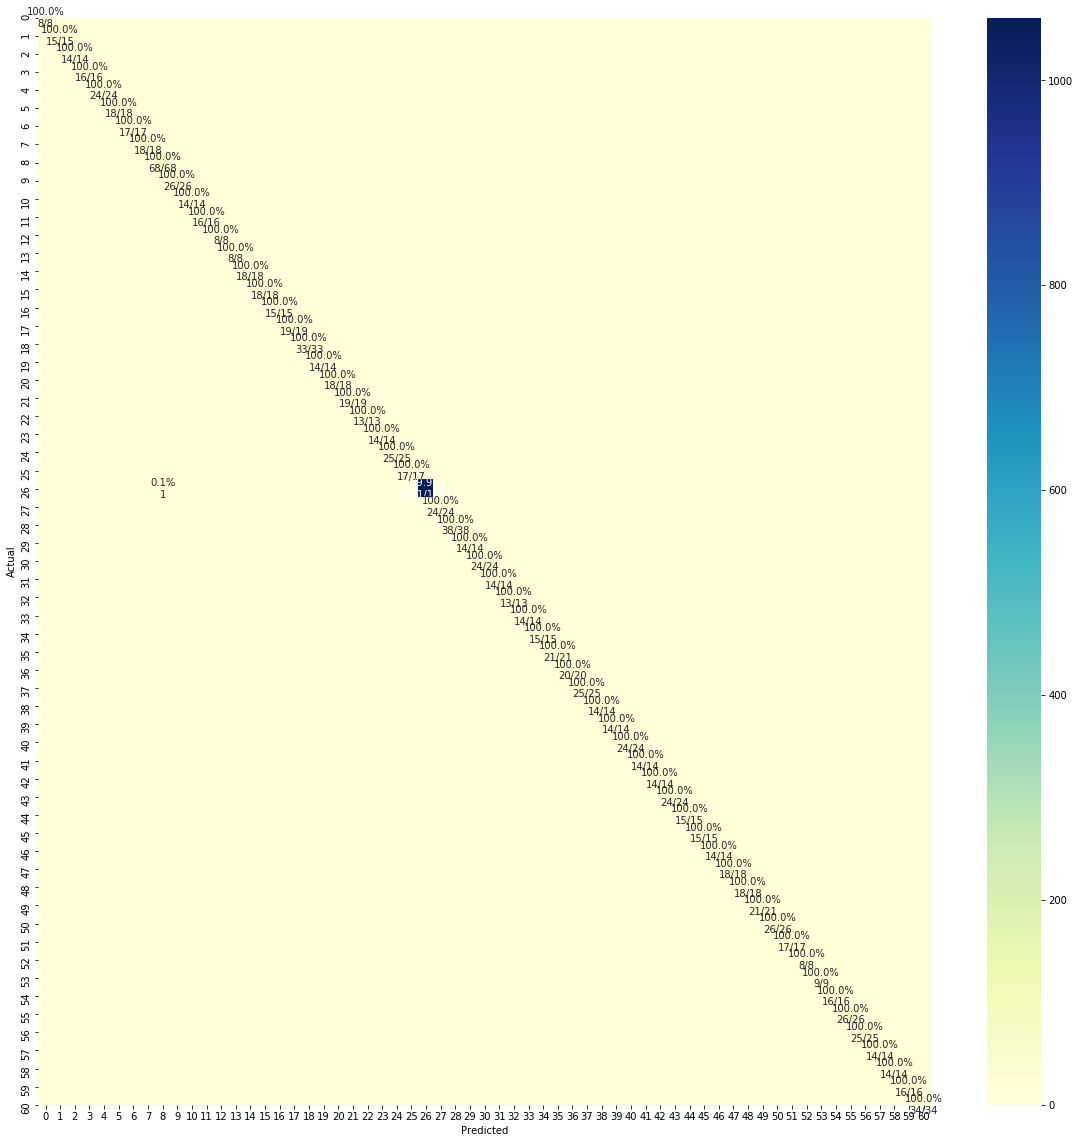

In [20]:
plot_cm(y_true=y_train, y_pred=train_pred)

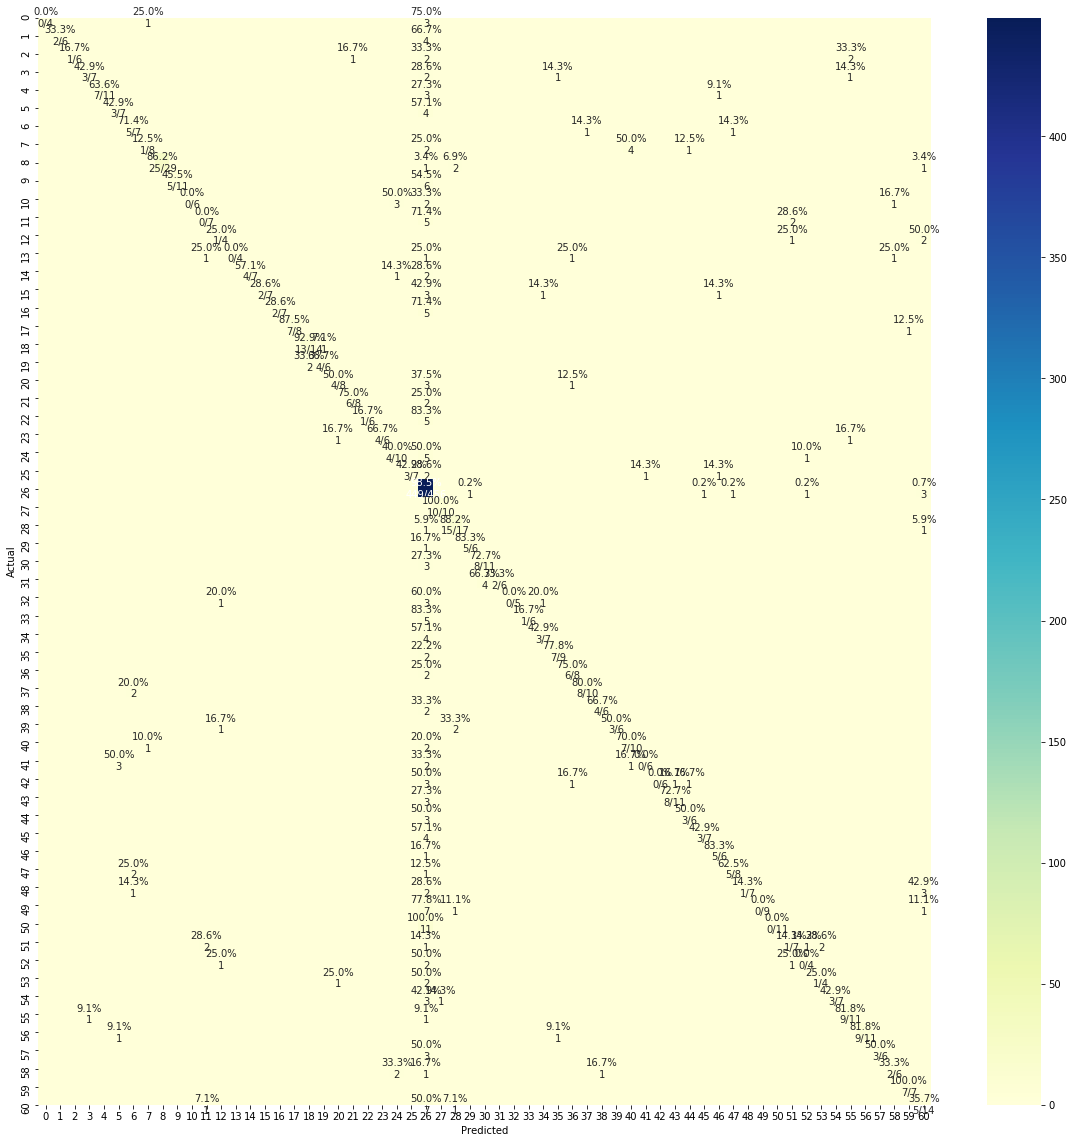

In [21]:
plot_cm(y_true=y_val, y_pred=val_pred)

# For Submit

In [22]:
test_set = []
for id_idx in range(test_features.id.min(), test_features.id.max()+1):
    #Chack empty id
    if test_features[test_features.id==id_idx].shape[0]==0:
        continue
    
    sample_set_by_id = test_features[test_features.id==id_idx]
    ################################################################ Acc Data ##########################
    #Caculate Mean value
    mx = sample_set_by_id.acc_x.mean()
    my = sample_set_by_id.acc_y.mean()
    mz = sample_set_by_id.acc_z.mean()
    
    #Caculate ABS Mean value
    mx_abs = abs(sample_set_by_id.acc_x).mean()
    my_abs = abs(sample_set_by_id.acc_y).mean()
    mz_abs = abs(sample_set_by_id.acc_z).mean()
    
    #Caculate STD Value
    sx = sample_set_by_id.acc_x.std()
    sy = sample_set_by_id.acc_y.std()
    sz = sample_set_by_id.acc_z.std()
    
    #Caculate Cov value
    cxy = np.cov(sample_set_by_id[["acc_x","acc_y"]].values.T)[0][1]
    cyz = np.cov(sample_set_by_id[["acc_y","acc_z"]].values.T)[0][1]
    czx = np.cov(sample_set_by_id[["acc_z","acc_x"]].values.T)[0][1]
    
    #Caculate Corr value
    rxy = cxy/(sx*sy)
    ryz = cyz/(sy*sz)
    rzx = czx/(sz*sx)
    
    ################################################################ Gyro Data ##########################
    #Caculate Mean value
    mx_g = sample_set_by_id.gy_x.mean()
    my_g = sample_set_by_id.gy_y.mean()
    mz_g = sample_set_by_id.gy_z.mean()
    
    #Caculate ABS Mean value
    mx_abs_g = abs(sample_set_by_id.gy_x).mean()
    my_abs_g = abs(sample_set_by_id.gy_y).mean()
    mz_abs_g = abs(sample_set_by_id.gy_z).mean()
    
    #Caculate STD Value
    sx_g = sample_set_by_id.gy_x.std()
    sy_g = sample_set_by_id.gy_y.std()
    sz_g = sample_set_by_id.gy_z.std()
    
    #Caculate Cov value
    cxy_g = np.cov(sample_set_by_id[["gy_x","gy_y"]].values.T)[0][1]
    cyz_g = np.cov(sample_set_by_id[["gy_y","gy_z"]].values.T)[0][1]
    czx_g = np.cov(sample_set_by_id[["gy_z","gy_x"]].values.T)[0][1]
    
    #Caculate Corr value
    rxy_g = cxy/(sx*sy)
    ryz_g = cyz/(sy*sz)
    rzx_g = czx/(sz*sx)
    
    test_set.append([mx, my, mz, mx_abs, my_abs, mz_abs, sx, sy, sz, cxy, cyz, czx, rxy, ryz, rzx,
                     mx_g, my_g, mz_g, mx_abs_g, my_abs_g, mz_abs_g, sx_g, sy_g, sz_g, cxy_g, cyz_g, czx_g,
                     rxy_g, ryz_g, rzx_g])


In [23]:
test_set = np.array(test_set)
print(test_set.shape)

(782, 30)


In [24]:
test_pred = clf.predict(test_set)

In [26]:
result_df = pd.DataFrame()
result_df['id'] = sample_submissuib.id
for i in range(61):
    result_df[i] = test_pred[:,i]

In [28]:
result_df.to_csv("/works/Data/Dacon/health_data_clf/result/210210.csv",index=False)